In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, f1_score
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
# file_path = "E:/DELL-KAVI/Desktop/New folder/Genetics Classification/Revision/OldDataset_2.csv"
file_path_generated = 'OldDataset_2.csv'
data = pd.read_csv(file_path)

In [5]:
# Encode categorical variables if necessary
label_encoders = {}
for column in ['Polymerase', 'AP Site', 'Size', 'Sequence']:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le


In [7]:
# Split the data into features (X) and target (y)
X = data[['Polymerase', 'AP Site', 'Size', 'Sequence']]
y = data['Outcome'] - 1  # Replace 'Outcome' with the actual name of the target column if different

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Train an XGBoost classifier
model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

C:\Users\DELL\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:37:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [11]:
# Feature importance
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(importance_df)


Feature Importances:
      Feature  Importance
2        Size    0.661981
3    Sequence    0.193439
0  Polymerase    0.144580
1     AP Site    0.000000


In [13]:
# Predict and evaluate using F1 score
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1}")

# Calculate feature importance
feature_importance = model.feature_importances_

F1 Score: 0.5333333333333334


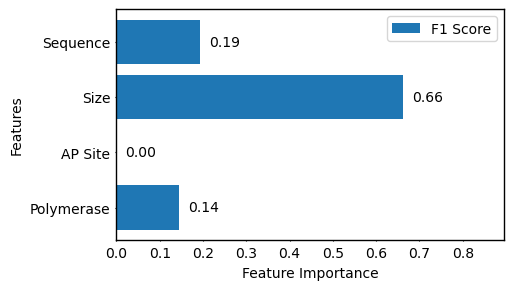

In [15]:
import matplotlib.pyplot as plt

# Increase x-axis limit to give space for values outside the bars
plt.figure(figsize=(5, 3))  # Adjust the size (width, height)
bars = plt.barh(X.columns, feature_importances, label='F1 Score')  # Set bar color and label

# Increase the xlim to add more space on the right side
xlim = plt.xlim()  # Get current x-axis limits
plt.xlim(0, xlim[1] + 0.2)  # Extend the right limit

# Add value annotations for each bar, placing them outside
for bar in bars:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height()/2  # Position for vertical centering
    # Place the value outside the bar (to the right)
    plt.text(width + 0.02, y_pos, f"{width:.2f}", va='center', fontsize=10)

plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.legend(loc='upper right',fontsize=10)

# Remove grid lines and ticks
plt.grid(False)
plt.tick_params(axis='both', which='both', length=1)  # Disable ticks

# Add border around the plot
plt.gca().spines['top'].set_linewidth(1)
plt.gca().spines['top'].set_color('black')
plt.gca().spines['bottom'].set_linewidth(1)
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_linewidth(1)
plt.gca().spines['left'].set_color('black')
plt.gca().spines['right'].set_linewidth(1)
plt.gca().spines['right'].set_color('black')

plt.show()
